<h1 style="text-align:center;font-size:50px;">DBSCAN Algorithm</h1>

# Imports 👇

In [213]:
import pandas
import numpy
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import seaborn
import matplotlib.pyplot as pyplot

##### 👇 setting the matplotlib configurations

In [214]:
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (15, 12)

# Data Reading 👇

In [215]:
data=pandas.read_csv('./Stress-Lysis.csv')

### 👇 cheking the columns, data, data type information, correlation between attributes

In [216]:
data.columns

Index(['Humidity', 'Temperature', 'Step count', 'Stress Level'], dtype='object')

In [217]:
data['Stress Level'].value_counts()

1    790
2    710
0    501
Name: Stress Level, dtype: int64

In [218]:
data

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
...,...,...,...,...
1996,21.82,90.82,96,1
1997,10.45,79.45,45,0
1998,27.22,96.22,135,2
1999,12.46,81.46,64,0


In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [220]:
data.describe()

,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


In [221]:
data.corr()

,Humidity,Temperature,Step count,Stress Level
Humidity,1.000000,1.000000,0.870486,0.936036
Temperature,1.000000,1.000000,0.870486,0.936036
Step count,0.870486,0.870486,1.000000,0.832623
Stress Level,0.936036,0.936036,0.832623,1.000000


# Data Visualization 👇

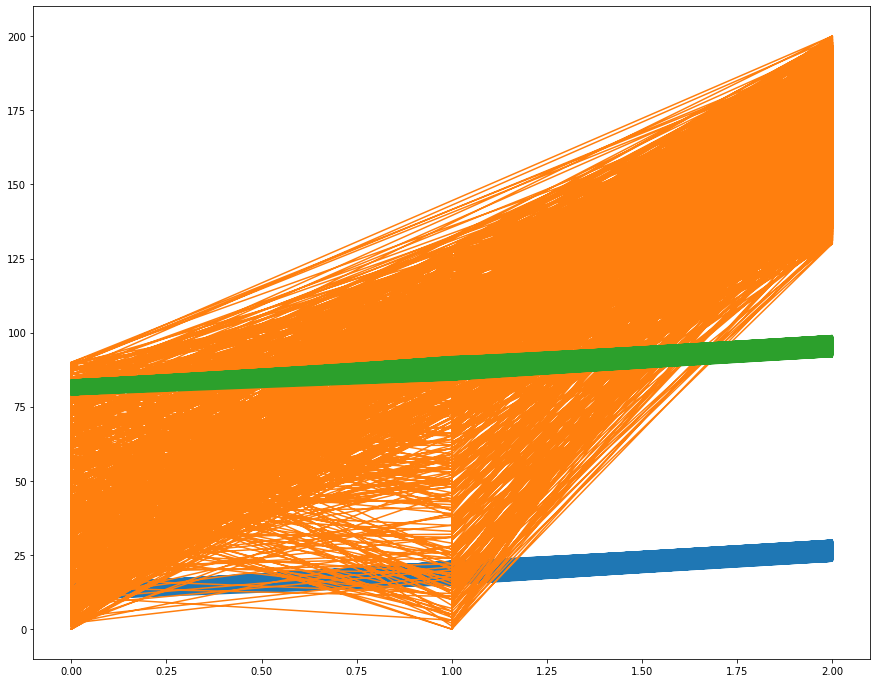

In [222]:
pyplot.plot(data['Stress Level'],data[['Humidity','Step count','Temperature']])

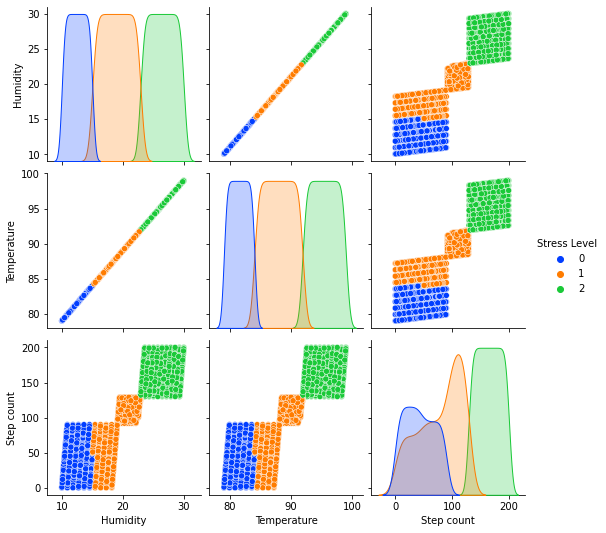

In [223]:
seaborn.pairplot(data.iloc[:,:4], hue="Stress Level",palette="bright")

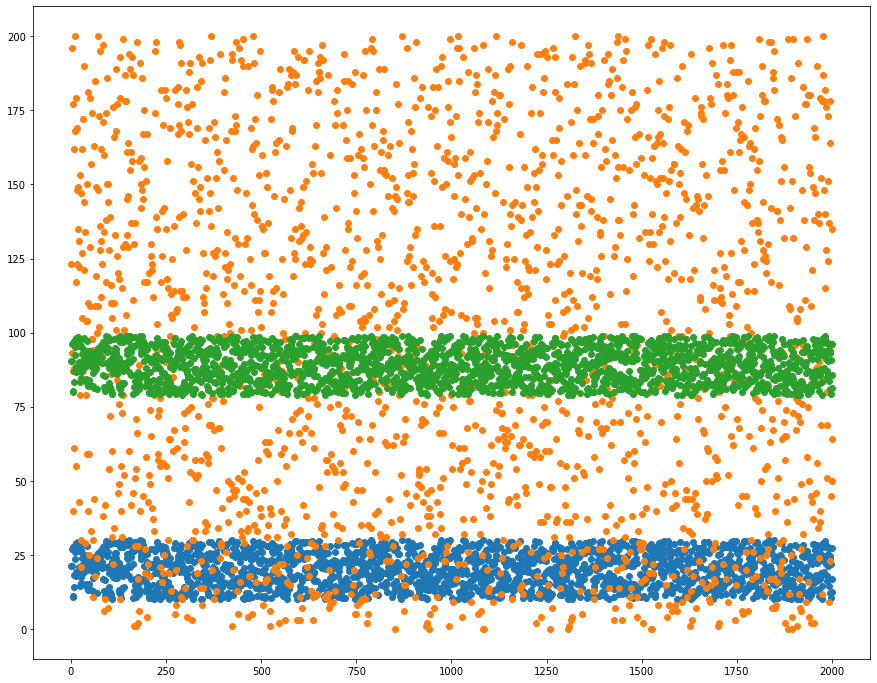

In [224]:
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data['Humidity'])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data['Step count'])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data['Temperature'])

<h1 style="text-align:center;font-size:50px;">Data Tranfomation</h1>

# Standization

In [235]:
standard_scaler = StandardScaler()

In [292]:
data_scaled=standard_scaler.fit_transform(data.iloc[:,:3])

In [293]:
data_scaled

array([[ 0.23024766,  0.23024766,  0.39297226],
       [ 0.24409715,  0.24409715, -0.12277161],
       [ 1.23260403,  1.23260403,  1.64794901],
       ...,
       [ 1.24991588,  1.24991588,  0.59926981],
       [-1.30531382, -1.30531382, -0.62132402],
       [-0.54186104, -0.54186104, -0.86200449]])

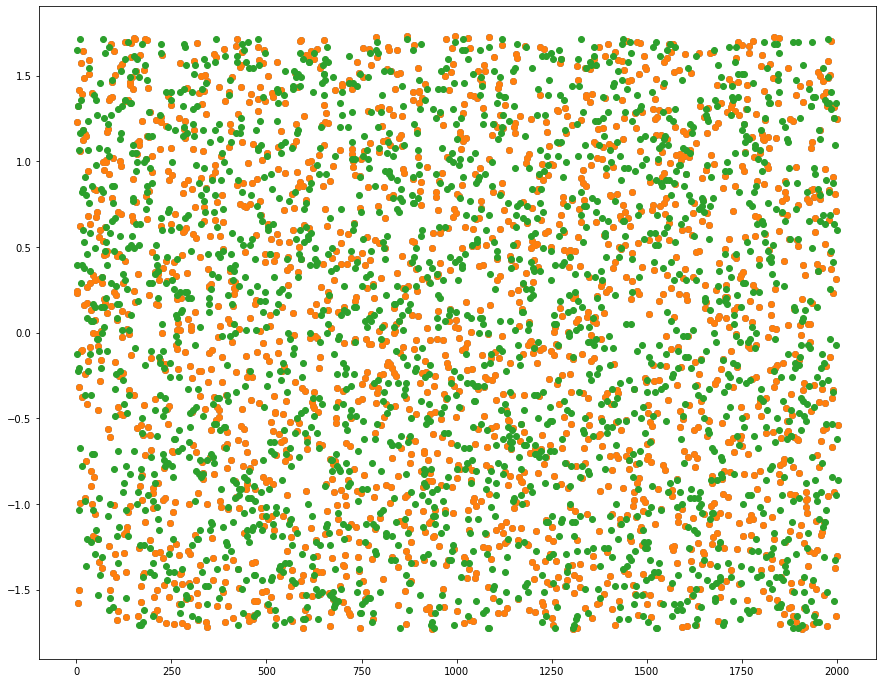

In [294]:
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data_scaled[:,0])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data_scaled[:,1])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data_scaled[:,2])

# Normalization

In [238]:
data_normalized = normalize(data_scaled)

In [239]:
data_normalized

array([[ 0.23024766,  0.23024766,  0.39297226],
       [ 0.24409715,  0.24409715, -0.12277161],
       [ 1.23260403,  1.23260403,  1.64794901],
       ...,
       [ 1.24991588,  1.24991588,  0.59926981],
       [-1.30531382, -1.30531382, -0.62132402],
       [-0.54186104, -0.54186104, -0.86200449]])

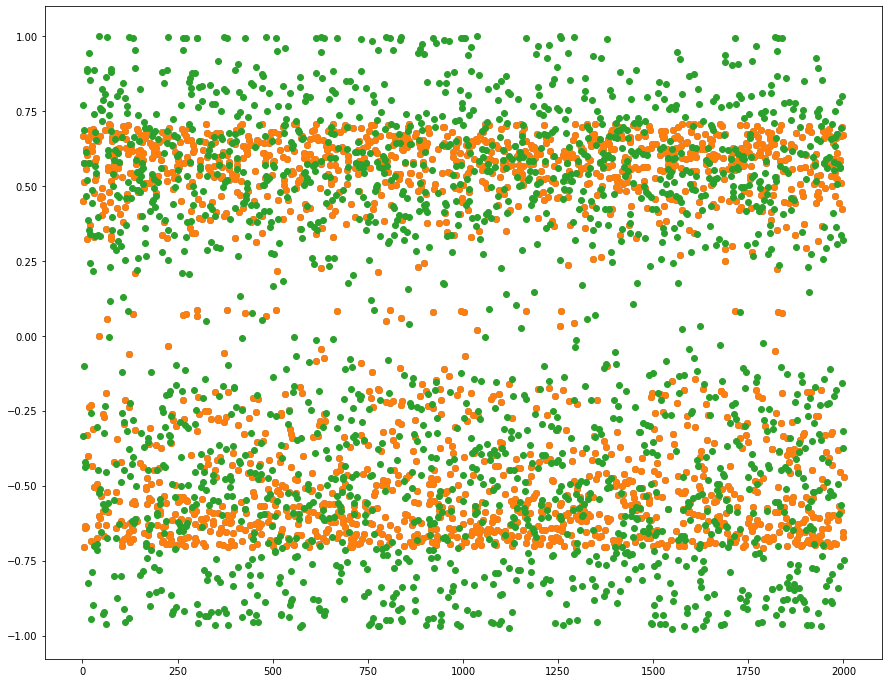

In [249]:
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data_normalized[:,0])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data_normalized[:,1])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=data_normalized[:,2])

# Dimentiality Reduction by PCA

In [241]:
Principal_Component_Analyser=PCA(n_components=2)

In [250]:
Component_Data=Principal_Component_Analyser.fit_transform(data_normalized[:,:3])

In [251]:
Component_Data

array([[-0.93938567, -0.24463135],
       [-0.53520737,  0.82792848],
       [-0.96221965, -0.12534513],
       ...,
       [-0.92516271,  0.30019518],
       [ 0.9836129 , -0.29694036],
       [ 1.00649774,  0.21616158]])

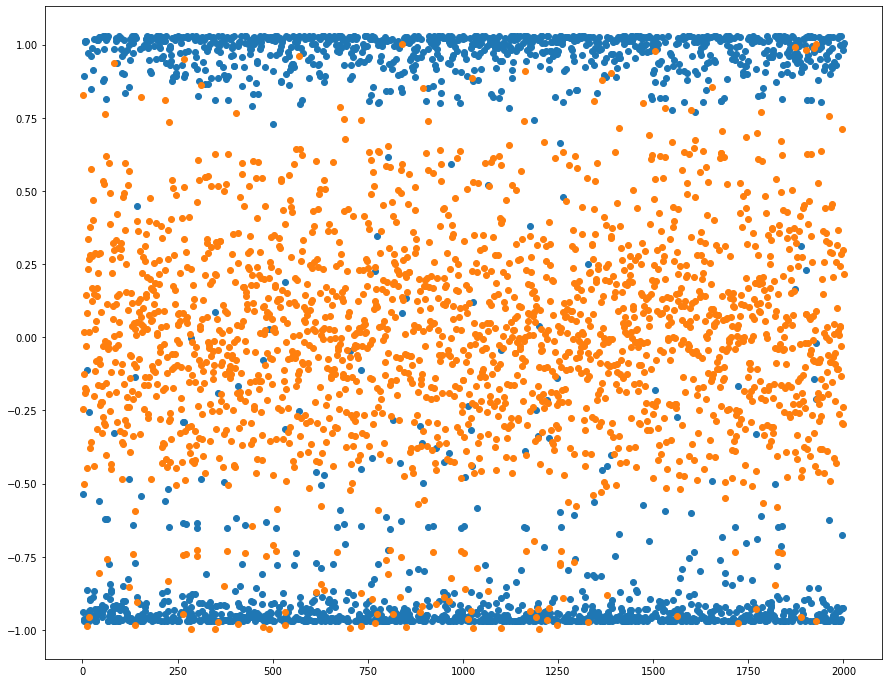

In [252]:
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=Component_Data[:,0])
pyplot.scatter(x=[i for i in range(1,len(data)+1)],y=Component_Data[:,1])

# Creating the DBSCAN instance👇

In [308]:
DBSCAN_Model=DBSCAN(eps=0.1,min_samples=10)

### fitting the model 👇

In [309]:
DBSCAN_Model.fit(Component_Data[:,:2])

DBSCAN(eps=0.1, min_samples=10)

In [310]:
set(list(DBSCAN_Model.labels_))

{-1, 0, 1, 2}

In [311]:
Transformed_data=pandas.DataFrame({
    "column1_by_PCA":Component_Data[:,0],
    "column2_by_PCA":Component_Data[:,1],
    "predicted_cluster_by_DBSCAN":DBSCAN_Model.labels_,
})

In [312]:
Transformed_data

,column1_by_PCA,column2_by_PCA,predicted_cluster_by_DBSCAN
0,-0.939386,-0.244631,0
1,-0.535207,0.827928,0
2,-0.962220,-0.125345,0
3,-0.970351,0.016618,0
4,0.893254,-0.501331,1
...,...,...,...
1996,-0.676137,0.711195,0
1997,0.999988,-0.238688,1
1998,-0.925163,0.300195,0
1999,0.983613,-0.296940,1


<AxesSubplot:>

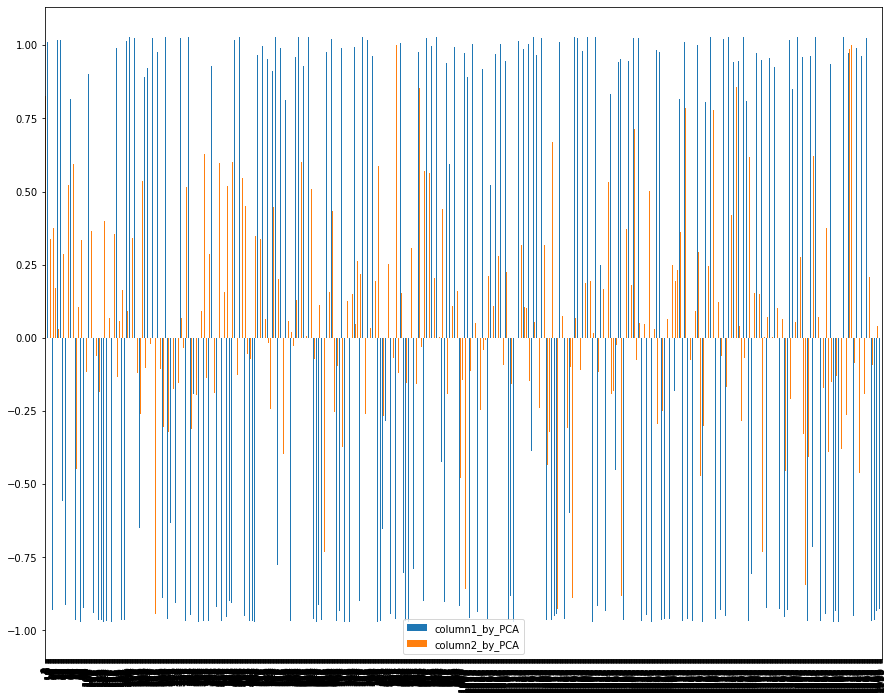

In [313]:
Transformed_data.iloc[:,:2].plot(kind="bar")

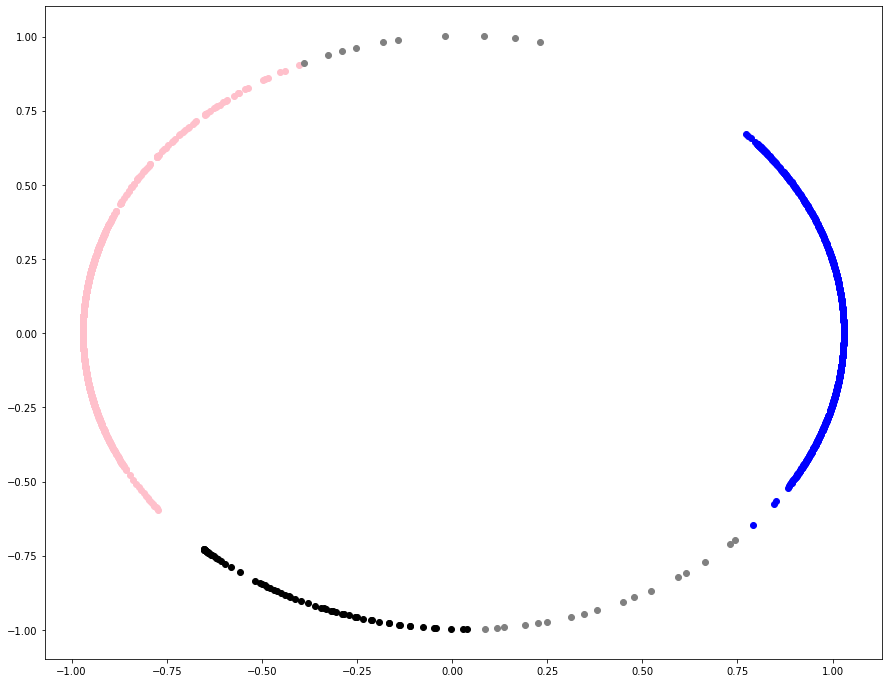

In [314]:
pyplot.scatter(x=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==1].iloc[:,0],y=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==1].iloc[:,1],c='blue')
pyplot.scatter(x=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==0].iloc[:,0],y=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==0].iloc[:,1],c='pink')
pyplot.scatter(x=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==2].iloc[:,0],y=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==2].iloc[:,1],c="black")
pyplot.scatter(x=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==-1].iloc[:,0],y=Transformed_data[Transformed_data['predicted_cluster_by_DBSCAN']==-1].iloc[:,1],c='gray')

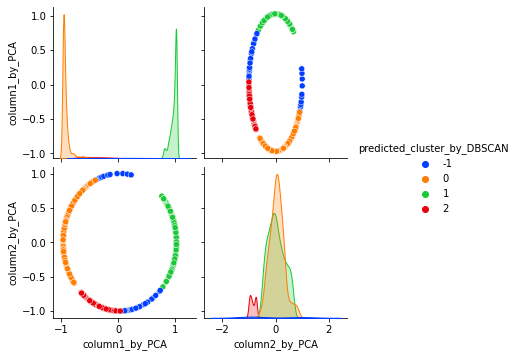

In [315]:
seaborn.pairplot(Transformed_data.iloc[:,:3], hue="predicted_cluster_by_DBSCAN",palette="bright")